✅ Accuracy: 0.6112
 Weighted F1-score: 0.5805

 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71      2552
           1       0.56      0.50      0.53      2075
           2       0.33      0.00      0.01       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.61      5002
   macro avg       0.19      0.16      0.16      5002
weighted avg       0.57      0.61      0.58      5002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


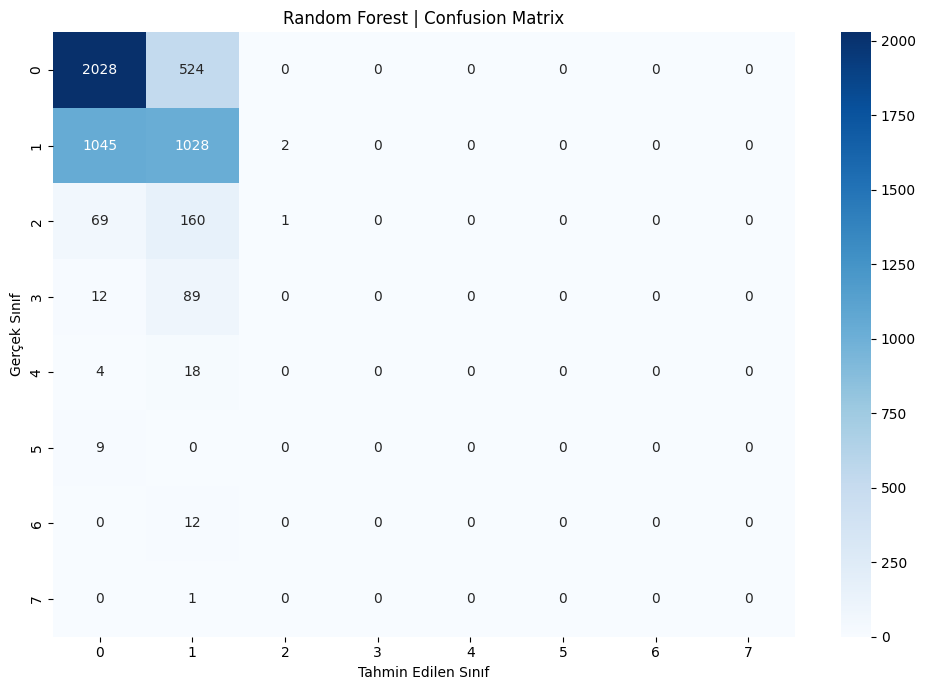

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


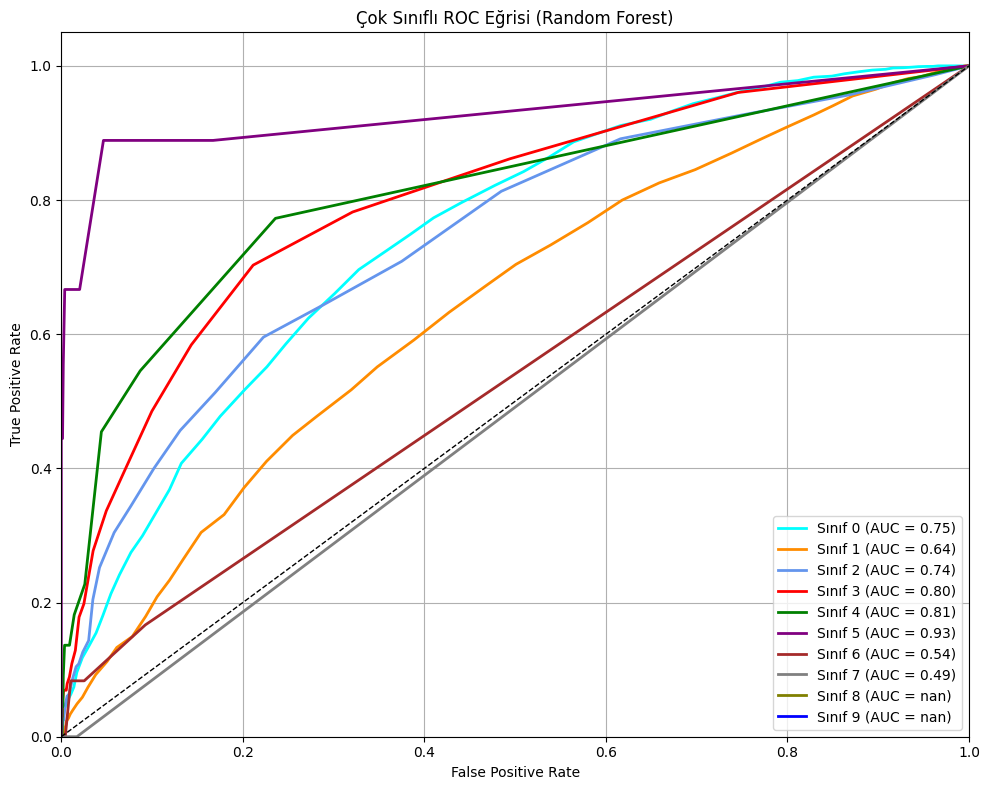

In [2]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri setini yükle (Poker Hand veri setinin training dosyası)
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

# 2. Girdi ve hedef değişken
X = df.drop("class", axis=1)
y = df["class"]

# 3. Eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Random Forest modelini oluştur ve eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Test kümesinde tahmin yap
y_pred = model.predict(X_test)

# 6. Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"✅ Accuracy: {accuracy:.4f}")
print(f" Weighted F1-score: {weighted_f1:.4f}\n")

print(" Classification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest | Confusion Matrix")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# 8. ROC Eğrisini Çizmek
n_classes = 10
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_pred_prob = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Renk döngüsü
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'gray', 'olive', 'blue'])

# Grafik çizimi
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Sınıf {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Çok Sınıflı ROC Eğrisi (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Accuracy: 0.9245
 Weighted F1-score: 0.9254

 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67      2470
           1       0.65      0.62      0.63      2528
           2       0.98      0.95      0.97      2581
           3       1.00      0.97      0.99      2507
           4       1.00      1.00      1.00      2485
           5       1.00      1.00      1.00      2523
           6       1.00      1.00      1.00      2439
           7       1.00      1.00      1.00      2508
           8       1.00      1.00      1.00      2488
           9       1.00      1.00      1.00      2457

    accuracy                           0.92     24986
   macro avg       0.93      0.92      0.93     24986
weighted avg       0.93      0.92      0.93     24986



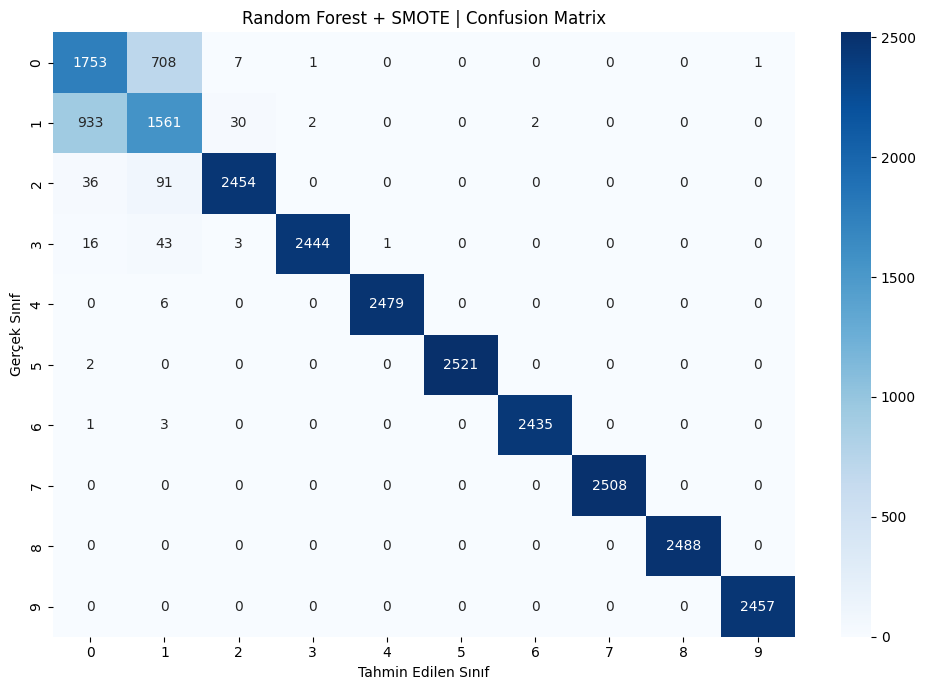

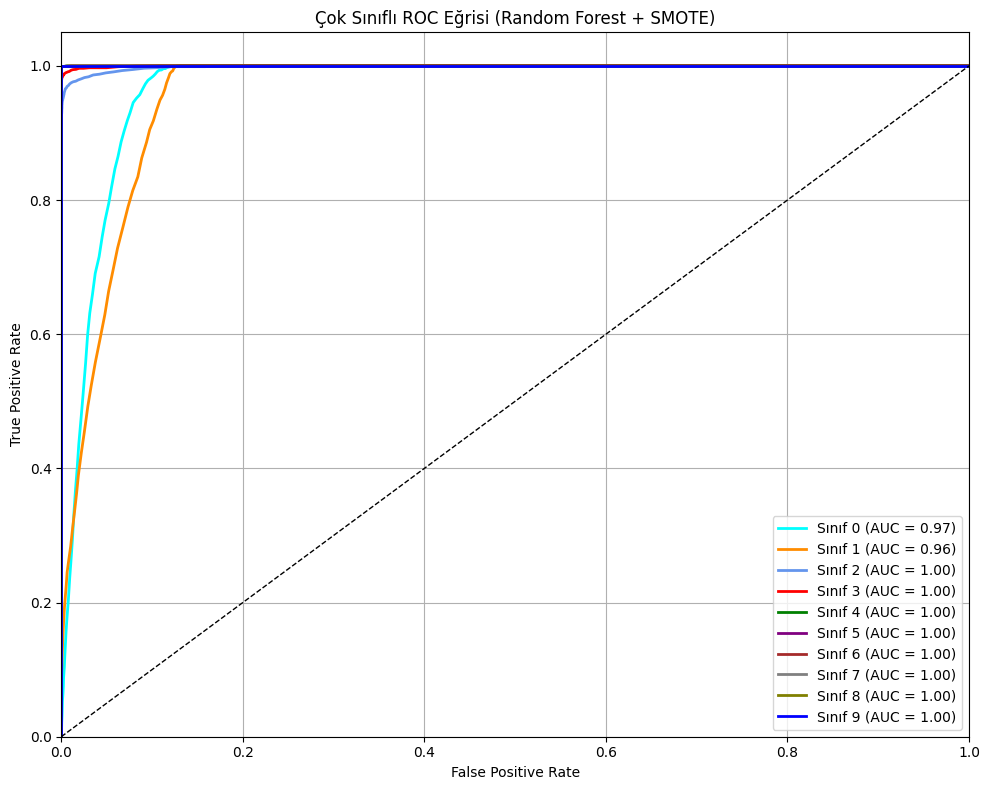

In [ ]:
# 1. Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# SMOTE ile dengesizliği düzeltmek için
from imblearn.over_sampling import SMOTE

# 2. Veri seti yükle
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

# 3. Girdi ve hedef değişken
X = df.drop("class", axis=1)
y = df["class"]

# 4. SMOTE uygulayarak veri dengesini sağla (k_neighbors=1 ile hata önlenir)
smote = SMOTE(random_state=42, k_neighbors=1)
X_balanced, y_balanced = smote.fit_resample(X, y)

# 5. Eğitim/test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# 6. Random Forest eğitimi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Tahmin
y_pred = model.predict(X_test)

# 8. Değerlendirme
accuracy = accuracy_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"✅ Accuracy: {accuracy:.4f}")
print(f" Weighted F1-score: {weighted_f1:.4f}\n")

print(" Classification Report:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest + SMOTE | Confusion Matrix")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()
# Devam niteliğinde: Önceki kodun üzerine eklenecek ROC kısmı

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from itertools import cycle

# 10 sınıfı binarize et (One-vs-Rest için gerekli)
n_classes = 10
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_pred_prob = model.predict_proba(X_test)

# Her sınıf için ROC eğrisi hesapla
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Renk döngüsü
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'gray', 'olive', 'blue'])

# Grafik çizimi
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Sınıf {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Çok Sınıflı ROC Eğrisi (Random Forest + SMOTE)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
